In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop
import os

<function matplotlib.pyplot.show(close=None, block=None)>

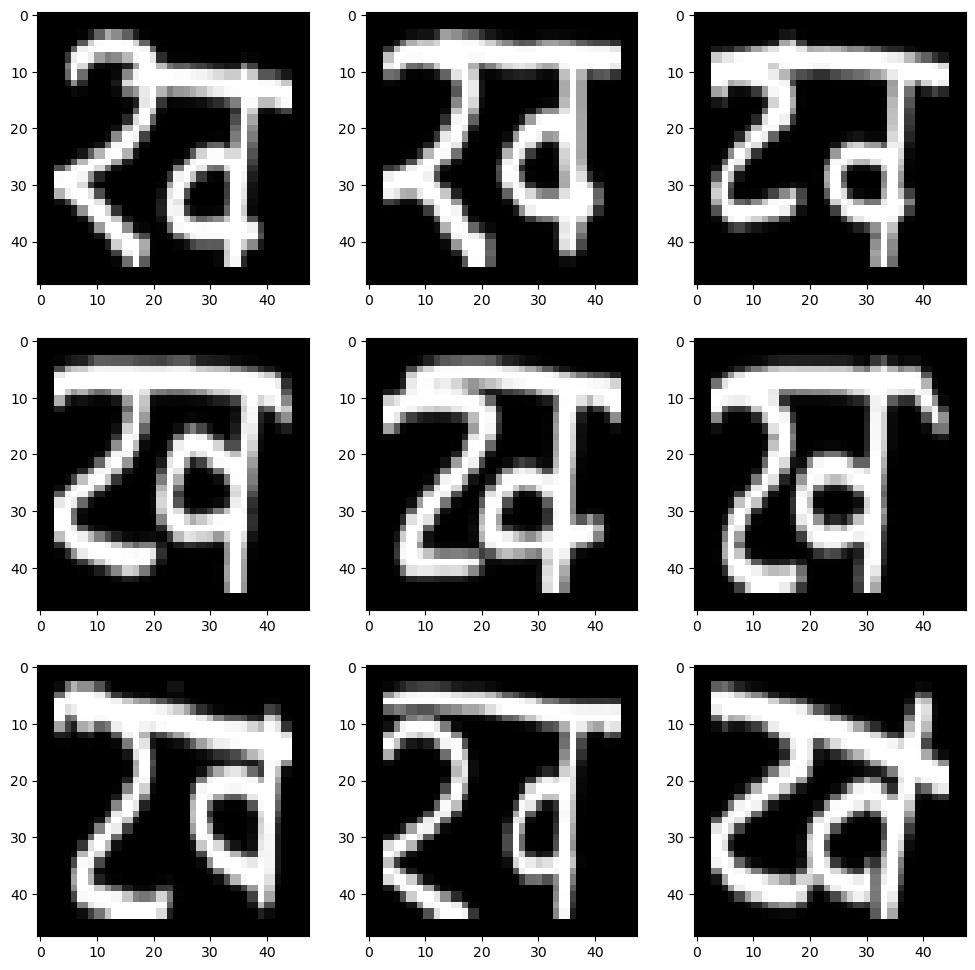

In [5]:
p_size=48
folder_path="content/"
expression='character_2_kha'
plt.figure(figsize=(12,12))
for i in range(1,10,1):
  plt.subplot(3,3,i)
  img=keras.preprocessing.image.load_img(folder_path+"Train/"+expression+"/"+os.listdir(folder_path+"Train/"+expression)[i+10],target_size=(p_size,p_size))
  plt.imshow(img)
plt.show

In [6]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
image_height, image_width = 48, 48
num_classes = 46  # For example, assuming 10 Hindi characters

# Load pre-trained VGG16 model without the fully connected layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze convolutional layers
for layer in vgg_base.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Provide the path to your dataset of Hindi characters
train_generator = train_datagen.flow_from_directory(
    folder_path+"Train",
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
model.fit(train_generator, epochs=10, steps_per_epoch=train_generator.samples // train_generator.batch_size)


58889256/58889256 [==============================] - 11s 0us/step


Found 78200 images belonging to 46 classes.
Epoch 1/10
2443/2443 [==============================] - 1397s 571ms/step - loss: 1.9049 - accuracy: 0.4512
Epoch 2/10
2443/2443 [==============================] - 901s 369ms/step - loss: 1.4033 - accuracy: 0.5789
Epoch 3/10
2443/2443 [==============================] - 935s 383ms/step - loss: 1.2890 - accuracy: 0.6085
Epoch 4/10
2443/2443 [==============================] - 920s 376ms/step - loss: 1.2338 - accuracy: 0.6259
Epoch 5/10
2443/2443 [==============================] - 958s 392ms/step - loss: 1.1855 - accuracy: 0.6416
Epoch 6/10
2443/2443 [==============================] - 952s 390ms/step - loss: 1.1610 - accuracy: 0.6465
Epoch 7/10
2443/2443 [==============================] - 944s 386ms/step - loss: 1.1381 - accuracy: 0.6548
Epoch 8/10
2443/2443 [==============================] - 969s 397ms/step - loss: 1.1248 - accuracy: 0.6579
Epoch 9/10
2443/2443 [==============================] - 984s 403ms/step - loss: 1.1142 - accuracy: 0.6627
E

In [8]:
model.save('vgg_character.keras')

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define callbacks
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Constants
p_size = 48 
batch_size = 128  
num_classes = 46  

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(
    folder_path + "Train",
    target_size=(p_size, p_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    folder_path + "Test",
    target_size=(p_size, p_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

input_shape = (p_size, p_size, 1)

input_layer = Input(shape=input_shape)

vgg_base = VGG16(weights='imagenet', include_top=False, input_tensor=input_layer)
vgg_output = Flatten()(vgg_base.output)
vgg_output = Dense(512, activation='relu')(vgg_output)
vgg_output = Dropout(0.5)(vgg_output)
vgg_output = Dense(num_classes, activation='softmax')(vgg_output)
vgg_model = Model(inputs=vgg_base.input, outputs=vgg_output)

resnet_base = ResNet50(weights='imagenet', include_top=False, input_tensor=input_layer)
resnet_output = Flatten()(resnet_base.output)
resnet_output = Dense(512, activation='relu')(resnet_output)
resnet_output = Dropout(0.5)(resnet_output)
resnet_output = Dense(num_classes, activation='softmax')(resnet_output)
resnet_model = Model(inputs=resnet_base.input, outputs=resnet_output)

inception_base = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_layer)
inception_output = Flatten()(inception_base.output)
inception_output = Dense(512, activation='relu')(inception_output)
inception_output = Dropout(0.5)(inception_output)
inception_output = Dense(num_classes, activation='softmax')(inception_output)
inception_model = Model(inputs=inception_base.input, outputs=inception_output)

ensemble_input = Concatenate()([vgg_model.output, resnet_model.output, inception_model.output])
ensemble_output = Dense(num_classes, activation='softmax')(ensemble_input)
ensemble_model = Model(inputs=[vgg_model.input, resnet_model.input, inception_model.input], outputs=ensemble_output)

ensemble_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

ensemble_model.fit(
    [train_set, train_set, train_set], 
    train_set.labels, 
    epochs=10,
    batch_size=batch_size,
    validation_data=([test_set, test_set, test_set], test_set.labels)  ,
    callbacks=callbacks_list
)
